In [2]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import pprint

In [3]:
percentages = [1,3,5,7,10]
files_linear_lr = ["linear_lr_results_%d.0_percent.npy" %p for p in percentages]
files = ["results_%d_percent.npy" %p for p in percentages]

In [4]:
# Dictionary that looks like this:
# key -> percentage, val -> [results of first run, ..., results of fifth run]
# results of nth run = [dict of epoch 1, ..., dict of epoch 5]
data1 = {p: np.load(file, allow_pickle=True) for p, file in zip(percentages, files)}
data_linear_lr = {p: np.load(file, allow_pickle=True) for p, file in zip(percentages, files_linear_lr)}

In [5]:
def get_f1_scores(data):
    data2 = collections.defaultdict(dict)
    for percentage in data:
        all_results = data[percentage]
        for i, run_results in enumerate(all_results):
            if i in [3, 4]: continue     # eliminate results from 4th and 5th run, as they contain zeros. 
            run = "r" + str(i+1)
            data2[percentage][run] = run_results

    # Create a dictionary of PRF (precision, recall, f1) data.
    prf = collections.defaultdict(dict)
    for percentage in data2:
        for run in data2[percentage]:
            prf_run_values = [data2[percentage][run][epoch]["PRF"] for epoch in range(5)]
            prf[percentage][run] = prf_run_values
            
    # Get the F1 scores in a dict of arrays. The shape of the array should be (3, 5), representing 3 runs of 5 epochs each.
    all_f1_pos = {}
    all_f1_neg = {}
    for percent in prf:
        pos_run = []
        neg_run = []
        for run in prf[percent]:
            arr_dics = prf[percent][run]
            pos_epochs = []
            neg_epochs = []
            for d in arr_dics:
                pos_epochs.append(d["Positive"][2])
                neg_epochs.append(d["Negative"][2])
            pos_run.append(pos_epochs)
            neg_run.append(neg_epochs)
        all_f1_pos[percent] = np.array(pos_run)
        all_f1_neg[percent] = np.array(neg_run)
    return all_f1_pos, all_f1_neg

In [6]:
# Get the data structures for each of the datasets
all_f1_pos, all_f1_neg = get_f1_scores(data1)
all_f1_pos_linear_lr, all_f1_neg_linear_lr = get_f1_scores(data_linear_lr)

In [7]:
def get_avg_std(all_f1_pos, all_f1_neg):
    # I want to take the average, over the three runs, of the F1 scores per epoch. 
    # In other words, I want to calculate avg_f1_score_epoch_1 = (sum of f1 scores of epoch 1) / 3. Same for the rest.
    avg_f1_scores_pos = {pctg: np.mean(scores_per_epoch, axis=0) for pctg, scores_per_epoch in all_f1_pos.items()}
    avg_f1_scores_neg = {pctg: np.mean(scores_per_epoch, axis=0) for pctg, scores_per_epoch in all_f1_neg.items()}
    avg_f1_scores = {"Positive": avg_f1_scores_pos, "Negative": avg_f1_scores_neg}
    # Get the standard deviation as well.
    std_f1_scores_pos = {pctg: np.std(scores_per_epoch, axis=0) for pctg, scores_per_epoch in all_f1_pos.items()}
    std_f1_scores_neg = {pctg: np.std(scores_per_epoch, axis=0) for pctg, scores_per_epoch in all_f1_neg.items()}
    std_f1_scores = {"Positive": std_f1_scores_pos, "Negative": std_f1_scores_neg}
    return avg_f1_scores, std_f1_scores

In [8]:
# Get the average and std of each setting
avg_f1_scores, std_f1_scores = get_avg_std(all_f1_pos, all_f1_neg)
avg_f1_scores_linear_lr, std_f1_scores_linear_lr = get_avg_std(all_f1_pos_linear_lr, all_f1_neg_linear_lr)

In [9]:
std_f1_scores["Positive"]

{1: array([0.20125369, 0.05105088, 0.06685759, 0.01775364, 0.00965946]),
 3: array([0.04711212, 0.02089886, 0.03827207, 0.02079976, 0.31358898]),
 5: array([0.01970361, 0.00771684, 0.00281564, 0.01941843, 0.00263547]),
 7: array([0.05203175, 0.04650213, 0.03302968, 0.01068415, 0.01173189]),
 10: array([0.02973486, 0.01608317, 0.01831122, 0.00758491, 0.03644273])}

EPOCH:  1
F1-score pos:  0.7307561627991035 linear lr:  0.7815274902231423
F1-score neg:  0.922888869933205 linear lr:  0.9279957500631864
EPOCH:  2
F1-score pos:  0.8018061683133452 linear lr:  0.8191113234591496
F1-score neg:  0.9328267610842915 linear lr:  0.9343046487606728
EPOCH:  3
F1-score pos:  0.7965712059224624 linear lr:  0.8134769400718035
F1-score neg:  0.9390852480047549 linear lr:  0.9314273017868029
EPOCH:  4
F1-score pos:  0.8009328070163311 linear lr:  0.8009389671361502
F1-score neg:  0.9306233561552709 linear lr:  0.9245955633052407
EPOCH:  5
F1-score pos:  0.8031606386445095 linear lr:  0.7990477141810676
F1-score neg:  0.9327017467100166 linear lr:  0.9236294637390193


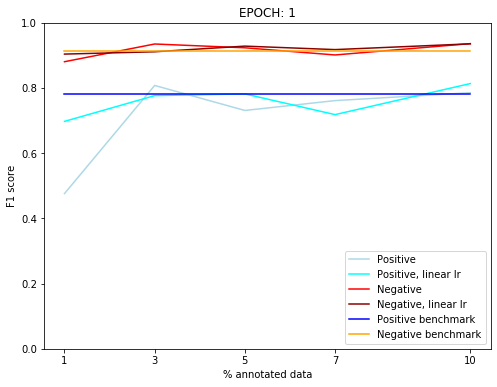

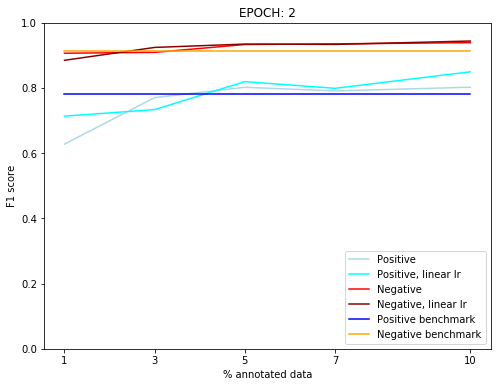

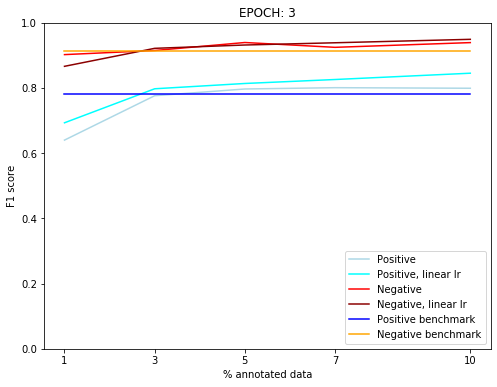

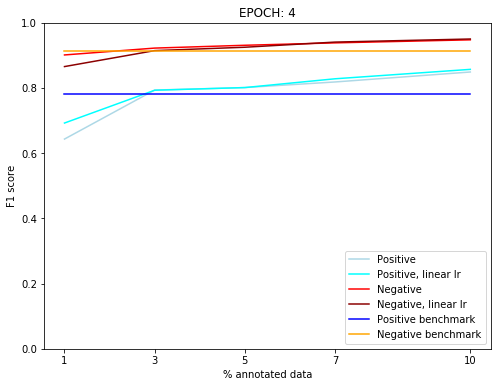

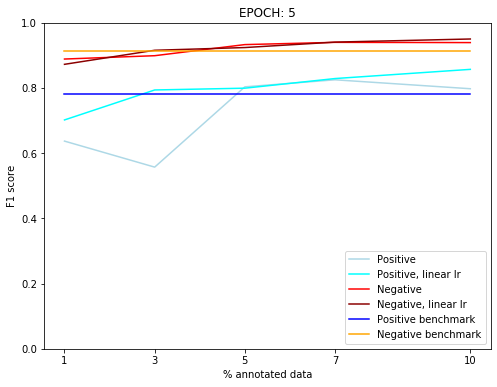

In [10]:
d = avg_f1_scores
d2 = std_f1_scores
d_l = avg_f1_scores_linear_lr
d2_l = std_f1_scores_linear_lr

# static values
acc_benchmark = .904
f1_benchmark_pos = .781
f1_benchmark_neg = .913
accuracy = [0.773, 0.895, 0.926]

f1_pos_5 = []
f1_neg_5 = []
f1_pos_5_linear = []
f1_neg_5_linear = []
for epoch in range(5):
    f1_pos = [d["Positive"][percentage][epoch] for percentage in percentages]
    f1_neg = [d["Negative"][percentage][epoch] for percentage in percentages]
    err_pos = [d2["Positive"][percentage][epoch] for percentage in percentages]
    err_neg = [d2["Negative"][percentage][epoch] for percentage in percentages]
    f1_pos_l = [d_l["Positive"][percentage][epoch] for percentage in percentages]
    f1_neg_l = [d_l["Negative"][percentage][epoch] for percentage in percentages]
    err_pos_l = [d2_l["Positive"][percentage][epoch] for percentage in percentages]
    err_neg_l = [d2_l["Negative"][percentage][epoch] for percentage in percentages]
    print('EPOCH: ', epoch+1)
    # add scores for each epoch for 5% of data
    print('F1-score pos: ',f1_pos[2], 'linear lr: ', f1_pos_l[2])
    print('F1-score neg: ',f1_neg[2], 'linear lr: ', f1_neg_l[2])
    f1_pos_5.append(f1_pos[2])
    f1_neg_5.append(f1_neg[2])
    f1_pos_5_linear.append(f1_pos_l[2])
    f1_neg_5_linear.append(f1_neg_l[2])
    plt.figure(figsize=(8,6))
    plt.ylabel("F1 score")
    plt.xlabel("% annotated data")
    plt.ylim(0,1)
    plt.xticks(percentages)
    
    plt.plot(percentages, f1_pos, color='lightblue', label="Positive")
    plt.plot(percentages, f1_pos_l, color='cyan', label="Positive, linear lr")

    plt.plot(percentages, f1_neg, color='red', label="Negative")
    plt.plot(percentages, f1_neg_l, color='darkred', label="Negative, linear lr")

    plt.plot(percentages, [f1_benchmark_pos for _ in percentages], c="blue", label="Positive benchmark")
    plt.plot(percentages, [f1_benchmark_neg for _ in percentages], c="orange",label="Negative benchmark")
    plt.legend(loc="lower right")
    plt.title("EPOCH: %d" %(epoch+1))
    plt.savefig("f1_scores_epoch %d_comparison" %(epoch+1))



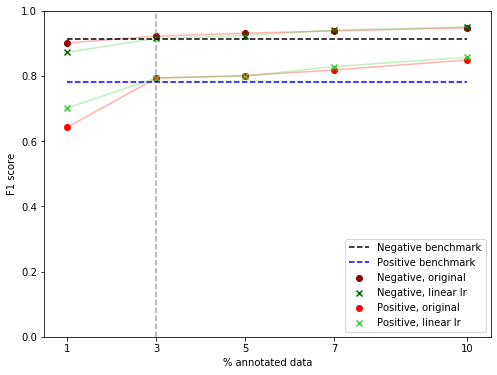

In [33]:
# Plot the best performing classifiers of each architecture:
# For original: epoch 4, For linear: epoch 5
f1_pos = [d["Positive"][percentage][3] for percentage in percentages]
f1_neg = [d["Negative"][percentage][3] for percentage in percentages]
err_pos = [d2["Positive"][percentage][3] for percentage in percentages]
err_neg = [d2["Negative"][percentage][3] for percentage in percentages]
f1_pos_l = [d_l["Positive"][percentage][4] for percentage in percentages]
f1_neg_l = [d_l["Negative"][percentage][4] for percentage in percentages]
err_pos_l = [d2_l["Positive"][percentage][4] for percentage in percentages]
err_neg_l = [d2_l["Negative"][percentage][4] for percentage in percentages]
# ADD the third architecture

plt.figure(figsize=(8,6))
plt.ylabel("F1 score")
plt.xlabel("% annotated data")
plt.ylim(0,1)
plt.xticks(percentages)
markers = ["o", "x", "^"]                                                  # markers for networks: original, linear, extended
colors = ["red", "limegreen", "darkblue", "darkred", "darkgreen", "lightblue"] # colors for networks: networks pos, networks neg

# Plot original negative.
plt.scatter(percentages, f1_neg, marker=markers[0], color=colors[3], label="Negative, original")
plt.plot(percentages, f1_neg, color=colors[0], alpha=.3)#, label="Negative")
#plt.errorbar(percentages, f1_neg, yerr=err_neg, color=colors[0])

# Plot linear negative.
plt.scatter(percentages, f1_neg_l, marker=markers[1], color=colors[4], label="Negative, linear lr")
plt.plot(percentages, f1_neg_l, color=colors[1], alpha=.3)# label="Negative, linear lr")
#plt.errorbar(percentages, f1_neg_l, yerr=err_neg_l, color=colors[1])

# Plot extended negative.

# Plot original positive.
plt.scatter(percentages, f1_pos, marker=markers[0], color=colors[0], label="Positive, original")
plt.plot(percentages, f1_pos, color=colors[0], alpha=.3)# label="Positive")
#plt.errorbar(percentages, f1_pos, yerr=err_pos, color=colors[0])

# Plot linear positive.
plt.scatter(percentages, f1_pos_l, marker=markers[1], color=colors[1], label="Positive, linear lr")
plt.plot(percentages, f1_pos_l, color=colors[1], alpha=.3)# label="Positive")
#plt.errorbar(percentages, f1_pos_l, yerr=err_pos_l, color=colors[1])

# Plot extended positive.



# Plot benchmarks.
plt.plot(percentages, [f1_benchmark_neg for _ in percentages], linestyle="--", c="black",label="Negative benchmark")
plt.plot(percentages, [f1_benchmark_pos for _ in percentages], linestyle="--", c="blue", label="Positive benchmark")

# Plot vline where benchmark is surpassed.
plt.vlines(3, 0, 1, linestyle="--", color="gray", alpha=.7)
plt.legend(loc="lower right")
plt.savefig("f1_scores_final_comparison")


In [17]:
err_pos_l, err_pos

([0.03714492220998503,
  0.046174802388318135,
  0.0035310965418264657,
  0.023457027928292566,
  0.020054585159774423],
 [0.01775364188530651,
  0.020799763562549842,
  0.019418425655660397,
  0.010684152530993129,
  0.007584907700818247])

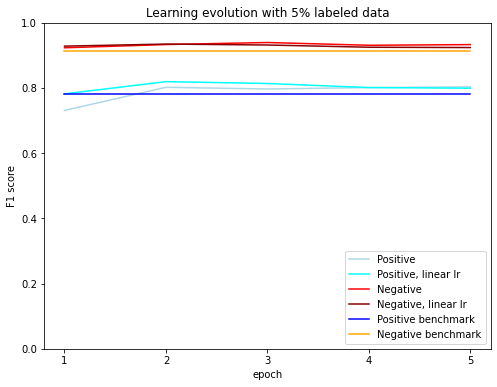

In [35]:
# plot the values for 5%
epochs = [1, 2, 3, 4, 5]
plt.figure(figsize=(8,6))
plt.ylabel("F1 score")
plt.xlabel("epoch")
plt.ylim(0,1)
plt.xticks(epochs)
plt.plot(epochs, f1_pos_5, color='lightblue', label="Positive")
plt.plot(epochs, f1_pos_5_linear, color='cyan', label="Positive, linear lr")
plt.plot(epochs, f1_neg_5, color='red', label="Negative")
plt.plot(epochs, f1_neg_5_linear, color='darkred', label="Negative, linear lr")

plt.plot(epochs, [f1_benchmark_pos for _ in epochs], c="blue", label="Positive benchmark")
plt.plot(epochs, [f1_benchmark_neg for _ in epochs], c="orange",label="Negative benchmark")
plt.legend(loc="lower right")
plt.title("Learning evolution with 5% labeled data")
plt.savefig("f1_scores_all_epochs_5_percent")